In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Vertical cyllinder

In [90]:
rho_s = 2710 # kg/m^3, density of solid
rho_l = 1000 # kg/m^3, density of fluid
eta_l = 0.001 # kg/m-s, viscosity of fluid
g = 9.8 # m/s^2, gravitational acceleration


In [91]:
df = pd.read_csv('./verticle_cyllinder.csv')
display(df.head())


,t,h_20,h_40,h_60,h_80,h_160
0,0,346.0,347.0,344.0,345,363.0
1,1,328.0,333.0,334.0,338,358.0
2,2,308.0,323.0,328.0,334,356.0
3,3,283.0,313.0,323.0,331,355.0
4,4,268.0,302.0,318.0,328,355.0


In [96]:
c = [20, 40, 60, 80, 160] # concentration (kg/m^3)
c = np.array(c)
u = np.zeros((len(c))) # velocity (m/s)
u[0] = df['h_20'][0] - df['h_20'][1] # mm/min
u[1] = df['h_40'][0] - df['h_40'][1] # mm/min
u[2] = df['h_60'][0] - df['h_60'][1] # mm/min
u[3] = df['h_80'][0] - df['h_80'][1] # mm/min
u[4] = df['h_160'][0] - df['h_160'][1] # mm/min

u /= 60 # mm/s
print(u, c)


[0.3        0.23333333 0.16666667 0.11666667 0.08333333] [ 20  40  60  80 160]


$$
    u_s = u_t * (1 - k * \frac{c}{\rho_s})^n
$$

$$
    (\frac{u_1}{u_2})^{1/n} = \frac{1 - k*\frac{c_1}{\rho_s}}{1 - k*\frac{c_2}{\rho_s}} = \alpha
$$

$$
    k = \frac{\rho_s * (1 - \alpha)}{c_1 - \alpha * c_2}
$$

In [95]:
n = 4.5
k = [0] * len(c)

for i in range(1, len(c)):
    alpha = (u[i] / u[i-1])**(1/n)
    k[i] = rho_s * (1 - alpha) / (c[i] - alpha * c[i-1])

k = sum(k) / len(k)

print("Average k: ", k)


k:  [0, 6.9807542861358565, 8.532589372065589, 8.404073284481672, 2.2765012182986823]
Average k:  5.238783632196361


Terminal velocity: 0.29053260485479465 mm/s


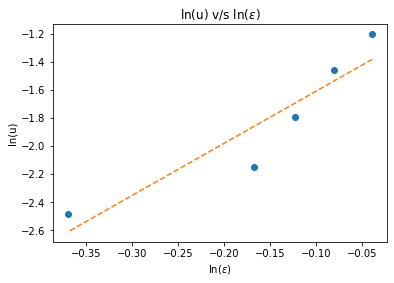

In [118]:
epsilon = 1 - k * c / rho_s

ln_u = np.log(u)
ln_epsilon = np.log(epsilon)

plt.plot(ln_epsilon, ln_u, 'o')

_m, _c = np.polyfit(ln_epsilon, ln_u, 1)
plt.plot(ln_epsilon, _m * ln_epsilon + _c, '--')

plt.xlabel('ln($\epsilon$)')
plt.ylabel('ln(u)')
plt.title('ln(u) v/s ln($\epsilon$)')

u_t = np.exp(_c) # mm
print(f"Terminal velocity: {u_t} mm/s")
u_t *= 1e-3 # m


In [119]:
rho_eff = ((k-1) * rho_l + rho_s) / k
D_p = np.sqrt((18 * eta_l * u_t) / (g * (rho_eff - rho_l))) # m, particle diameter
print(f"Effective diameter: {D_p * 1e6} micron")

error = (50e-6 - D_p) / D_p * 100
print(f"Percent error: {error} %")

Re = rho_eff * u_t * D_p / eta_l
print(f"Reynolds number: {Re}")


Effective diameter: 40.433173506401744 micron
Percent error: 23.660835061792902 %
Reynolds number: 0.015581563518942085


# Tilted cyllinder

In [ ]:
w = 102.5 # mm
b = 100.5 # mm
theta = 15 # deg

